In [3]:




import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/mnt/c/Users/apl_d/Desktop/Faculdade/Introduction to Data Science/feup-icd-project/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
df = pd.read_csv('../data/customer.csv')
df.shape

(72458, 15)

In [3]:
list(df.columns)


['Unnamed: 0',
 'custid',
 'sex',
 'is_employed',
 'income',
 'marital_status',
 'health_ins',
 'housing_type',
 'num_vehicles',
 'age',
 'state_of_res',
 'code_column',
 'gas_usage',
 'rooms',
 'recent_move_b']

Before exploring the statistical properties of the dataset, let's first look at the columns and their meanings, in the context of our problem.

The columns are:
- _unnamed_: an index column
- **custid**: the unique ID of the customer
- **sex**: the gender of the customer
- **is_employed**: indicates whether the customer is employed or not
- **income**: numerical value representing the customer's income
- **marital_status**: the marital status of the customer
- **health_ins**: indicates whether the customer has health insurance or not. This can be the target variable in the context of a classification problem.
- **housing_type**: describes the situation of the customer's habitation
- **num_vehicles**: the number of vehicles the customer owns
- **age**: the age of the customer in years
- **state_of_res**: the US state where the customer resides
- **code_column**: likely a categorical or code-based feature (potentially related to location or demographics).
- **gas_usage**: a measure of the customer's gas usage
- **rooms**: the number of rooms in the customer's house
- **recent_move_b**: indicator if the customer has recently moved

In [4]:
profile = ProfileReport(df, title='report', explorative=True)
profile.to_file("data-report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 28.17it/s]


In [23]:
print(df.isnull().sum())
t_sum = df.isnull().sum().sum()
percentual = t_sum/(len(df)*len(df.columns))*100
print(f'\nTotal NaN values {t_sum}')
print(f'{percentual}% of missing values')

Unnamed: 0            0
custid                0
sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type       1686
num_vehicles       1686
age                   0
state_of_res          0
code_column           0
gas_usage          1686
rooms                 0
recent_move_b      1687
dtype: int64

Total NaN values 32260
2.968156265238713% of missing values


In [6]:
print(f'Total Duplicated rows {df.duplicated().sum()}')

Total Duplicated rows 0


As we can see the DataSet have 32260 missing values ​​this corresponds to approximately 2.97% of the values, most of them in is_emplyed.
There are no duplicated rows.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      72458 non-null  int64  
 1   custid          72458 non-null  object 
 2   sex             72458 non-null  object 
 3   is_employed     46943 non-null  object 
 4   income          72458 non-null  float64
 5   marital_status  72458 non-null  object 
 6   health_ins      72458 non-null  bool   
 7   housing_type    70772 non-null  object 
 8   num_vehicles    70772 non-null  float64
 9   age             72458 non-null  int64  
 10  state_of_res    72458 non-null  object 
 11  code_column     72458 non-null  int64  
 12  gas_usage       70772 non-null  float64
 13  rooms           72458 non-null  int64  
 14  recent_move_b   70771 non-null  object 
dtypes: bool(1), float64(3), int64(4), object(7)
memory usage: 7.8+ MB


Since custid and unnamed have no duplicate or missing values, and both correspond to the row and id respectively, we will not analyze them because they are useless for the evaluation.

# Sex

sex
Female            37461
Male              34997
Missing values        0
Name: count, dtype: int64


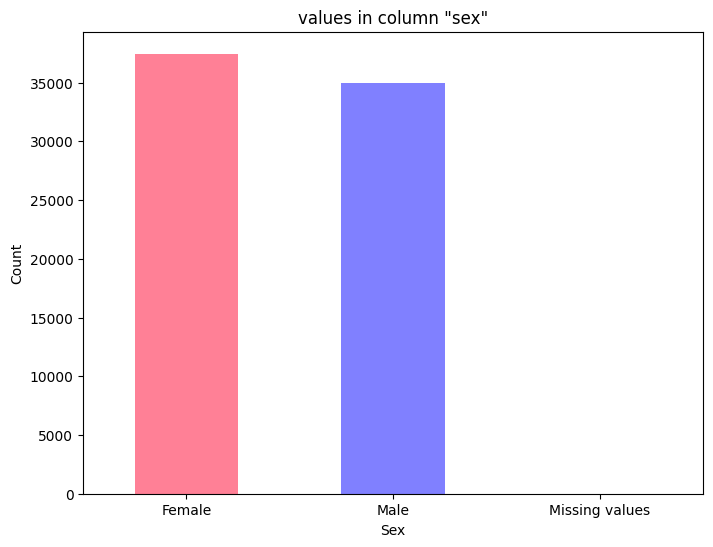

In [24]:
sex_counts = df['sex'].value_counts()
sex_counts['Missing values'] = df['sex'].isnull().sum()
print(sex_counts)
plt.figure(figsize=(8, 6)) 
sex_counts.plot(kind='bar',color=['#FF8096','#8080FF'])
plt.title('values in column "sex"')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The data is balanced and there are no missing values, which is perfect for the data.

# is_imployed

is_employed
True              44630
False              2313
Missing values    25515
Name: count, dtype: int64


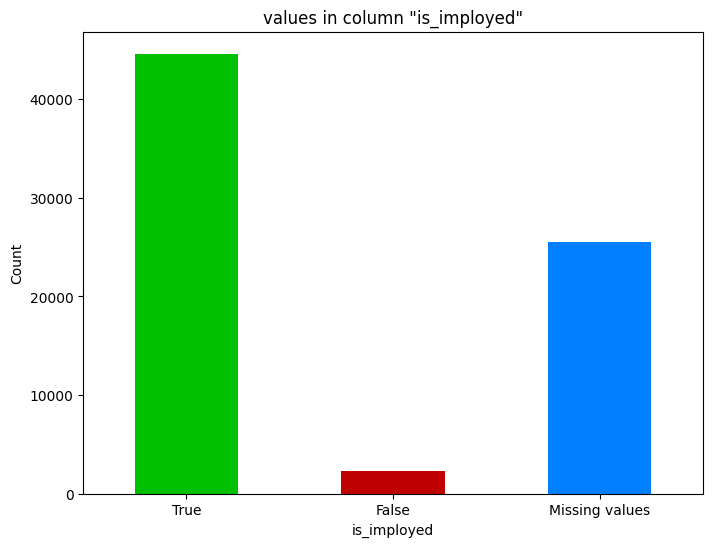

In [25]:
is_imployed_counts = df['is_employed'].value_counts()
is_imployed_counts['Missing values'] = df['is_employed'].isnull().sum()
print(is_imployed_counts)
plt.figure(figsize=(8, 6)) 
is_imployed_counts.plot(kind='bar',color=['#00C000','#BF0000','#0080FF'])
plt.title('values in column "is_imployed"')
plt.xlabel('is_imployed')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The data is not balanced and there are 25515 missing values, which is not good.

Let's try to find some relation between this missing values.

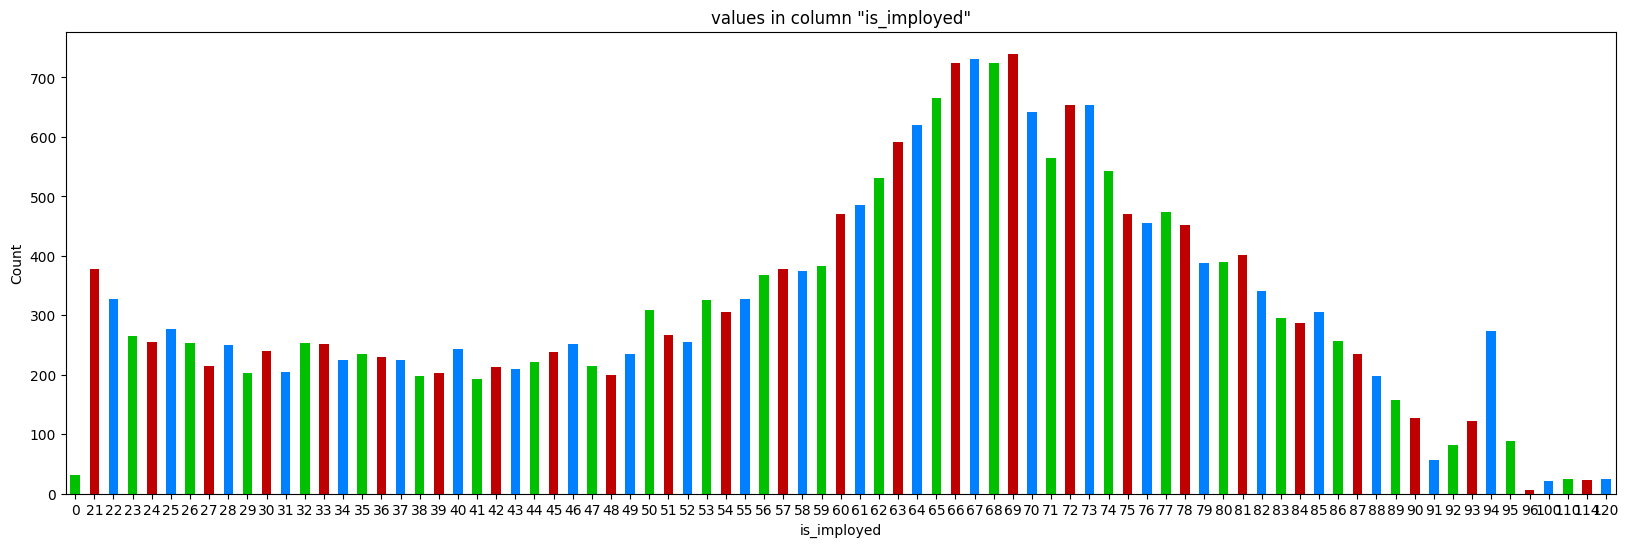

In [26]:
df_aux = df[df['is_employed'].isnull()]

age_in_is_imployed_missing_values_counts = df_aux['age'].value_counts()
age_in_is_imployed_missing_values_counts = age_in_is_imployed_missing_values_counts.sort_index()
plt.figure(figsize=(20, 6)) 
age_in_is_imployed_missing_values_counts.plot(kind='bar',color=['#00C000','#BF0000','#0080FF'])
plt.title('values in column "is_imployed"')
plt.xlabel('is_imployed')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [27]:
df_fixed = df.copy()
#df_fixed = df_fixed.dropna()
df_fixed.loc[(df_fixed['is_employed'].isnull()), 'is_employed'] = False
df_fixed.isnull().sum()

Unnamed: 0           0
custid               0
sex                  0
is_employed          0
income               0
marital_status       0
health_ins           0
housing_type      1686
num_vehicles      1686
age                  0
state_of_res         0
code_column          0
gas_usage         1686
rooms                0
recent_move_b     1687
dtype: int64

average retirement age in the united states is 66 then we decide to fill the is_employed with age > 66 with false this change the missing value from 2.9 to 1.9

is_employed
True              44630
False             27828
Missing values        0
Name: count, dtype: int64


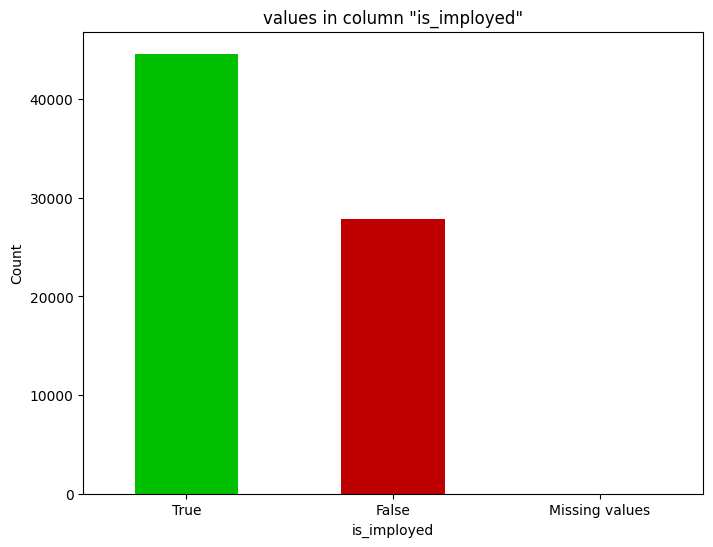

In [28]:
is_imployed_counts = df_fixed['is_employed'].value_counts()
is_imployed_counts['Missing values'] = df_fixed['is_employed'].isnull().sum()
print(is_imployed_counts)
plt.figure(figsize=(8, 6)) 
is_imployed_counts.plot(kind='bar',color=['#00C000','#BF0000','#0080FF'])
plt.title('values in column "is_imployed"')
plt.xlabel('is_imployed')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

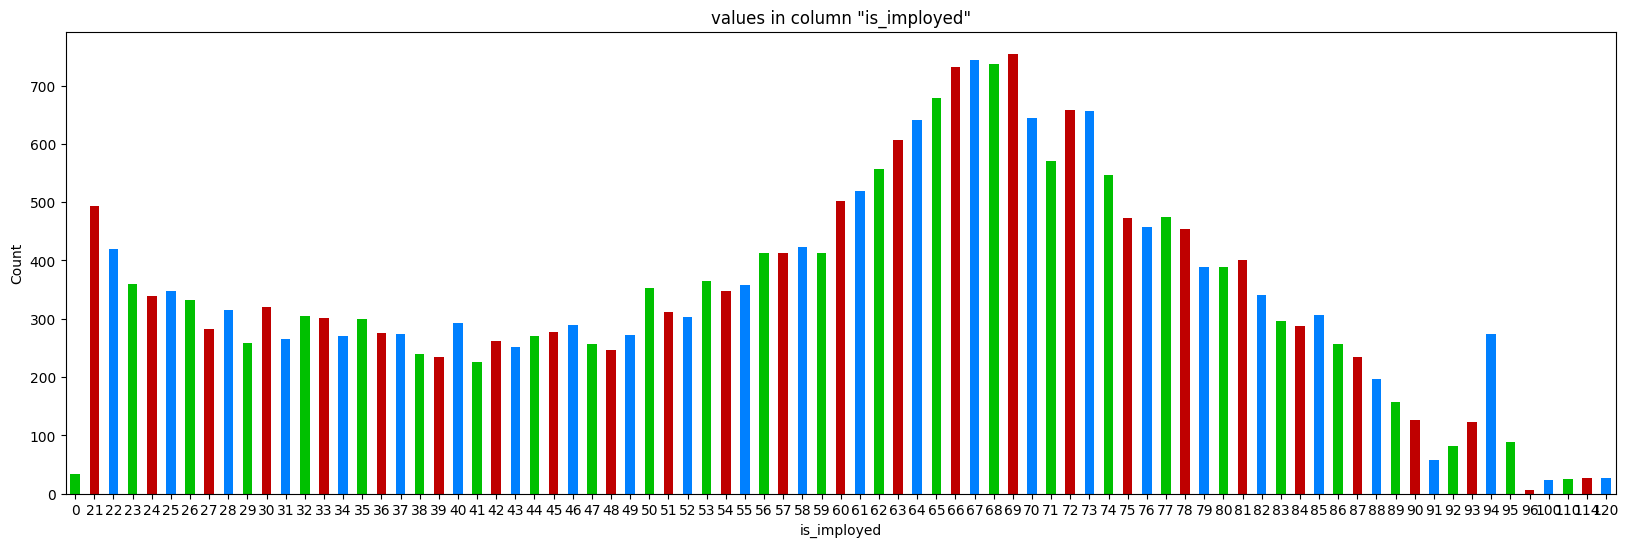

In [29]:
df_aux = df_fixed[df_fixed['is_employed'] == False]

age_in_is_imployed_missing_values_counts = df_aux['age'].value_counts()
age_in_is_imployed_missing_values_counts = age_in_is_imployed_missing_values_counts.sort_index()
plt.figure(figsize=(20, 6)) 
age_in_is_imployed_missing_values_counts.plot(kind='bar',color=['#00C000','#BF0000','#0080FF'])
plt.title('values in column "is_imployed"')
plt.xlabel('is_imployed')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

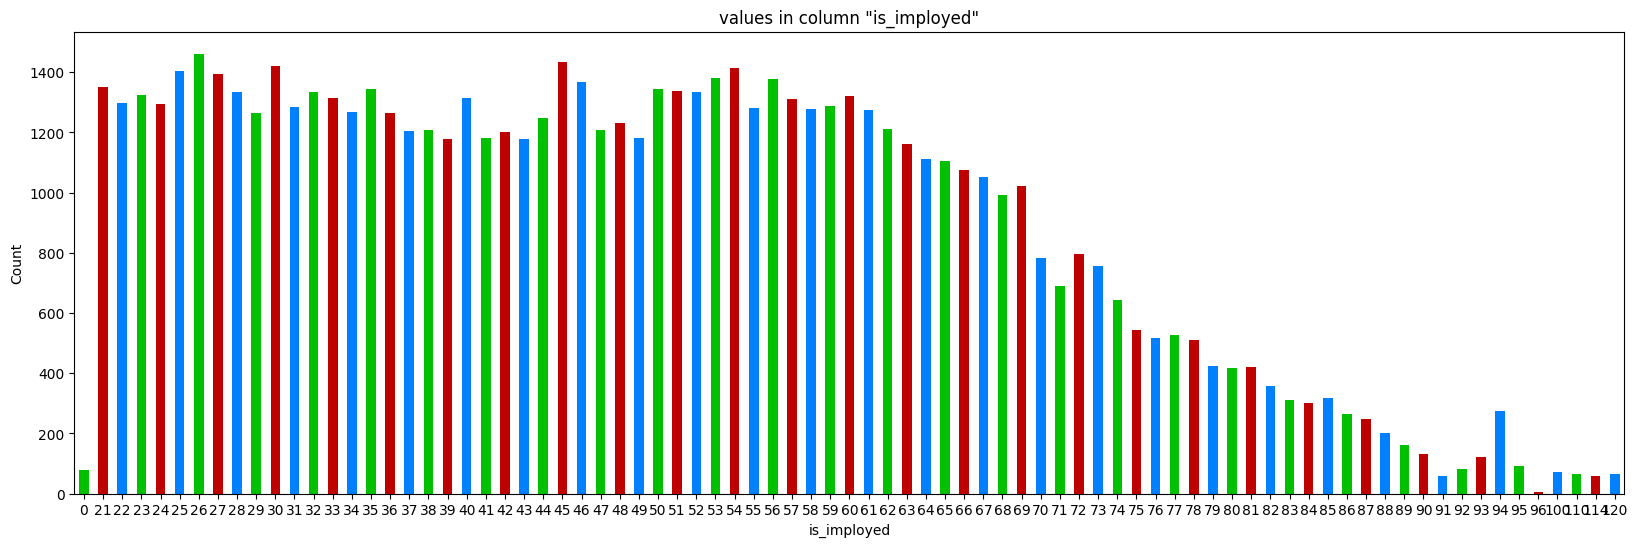

In [44]:
age_in_is_imployed_missing_values_counts = df['age'].value_counts()
age_in_is_imployed_missing_values_counts = age_in_is_imployed_missing_values_counts.sort_index()
plt.figure(figsize=(20, 6)) 
age_in_is_imployed_missing_values_counts.plot(kind='bar',color=['#00C000','#BF0000','#0080FF'])
plt.title('values in column "is_imployed"')
plt.xlabel('is_imployed')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [48]:
print(df[df['age']==0])

       Unnamed: 0        custid     sex is_employed   income  \
594           823  000881186_01    Male        True  50000.0   
1260         1773  000054490_02    Male       False      0.0   
1658         2332  000432667_03  Female        True  24700.0   
2340         3304  001119983_05  Female        True   2400.0   
2859         4048  000377914_02  Female         NaN   9700.0   
...           ...           ...     ...         ...      ...   
67967       93859  000764269_01  Female         NaN   5000.0   
68681       94849  001308522_01  Female        True  80000.0   
69200       95538  000225215_02    Male         NaN      0.0   
70015       96667  000954515_01    Male        True  75000.0   
70179       96887  001105751_02  Female        True  65000.0   

           marital_status  health_ins                  housing_type  \
594         Never married       False                        Rented   
1260              Married        True                        Rented   
1658        Never 

# income

income
0.0         6691
30000.0     1650
20000.0     1394
40000.0     1390
50000.0     1357
            ... 
269000.0       1
9910.0         1
23120.0        1
35060.0        1
26850.0        1
Name: count, Length: 4445, dtype: int64


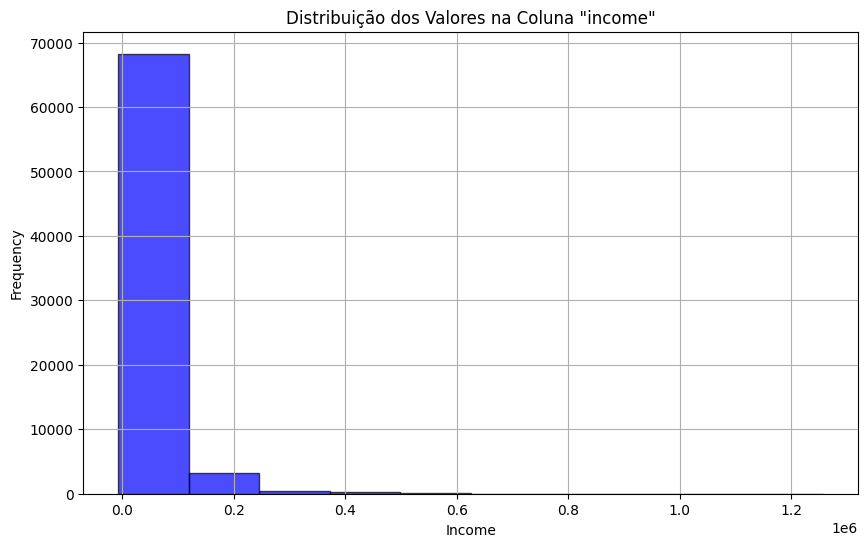

In [30]:
is_imployed_counts = df['income'].value_counts()
print(is_imployed_counts)
plt.figure(figsize=(10, 6)) 
plt.hist(df['income'], bins=10, color='blue', edgecolor='black', alpha=0.7) 
plt.title('Distribuição dos Valores na Coluna "income"') 
plt.xlabel('Income') 
plt.ylabel('Frequency') 
plt.grid(True) 
plt.show()

follow a law distribution then we should use a log normalization

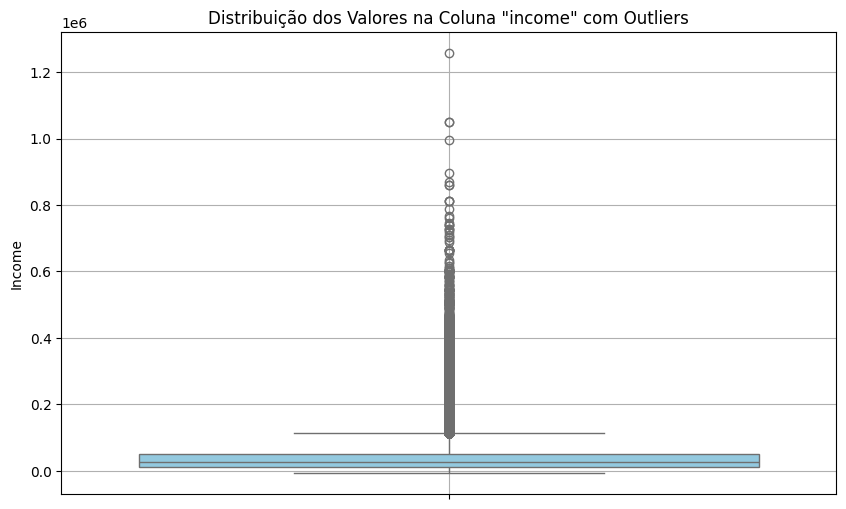

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico boxplot para a coluna 'income'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['income'], color='skyblue')
plt.title('Distribuição dos Valores na Coluna "income" com Outliers')
plt.ylabel('Income')
plt.grid(True)
plt.show()



In [22]:
mean_income = df['income'].mean()
median_income = df['income'].median()
std_income = df['income'].std()
variance_income = df['income'].var()
print(f"Mean: {mean_income}\nMedian: {median_income}\nStandard deviation: {std_income}\nVariance: {variance_income}")

Mean: 41881.43496922355
Median: 26400.0
Standard deviation: 58274.60476891017
Variance: 3395929560.972688


In [29]:
min_income = df['income'].min()
max_income = df['income'].max()
percentiles = df['income'].quantile([0.25, 0.5, 0.75])

print(f"Min: {min_income}, Max: {max_income}")
print(f"Percentiles:\n{percentiles}")
Q1 = df['income'].quantile(0.25)  # 25th percentile
Q3 = df['income'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

print(f"IQR: {IQR}")
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Min: -6900.0, Max: 1257000.0
Percentiles:
0.25    10700.0
0.50    26400.0
0.75    52000.0
Name: income, dtype: float64
IQR: 41300.0


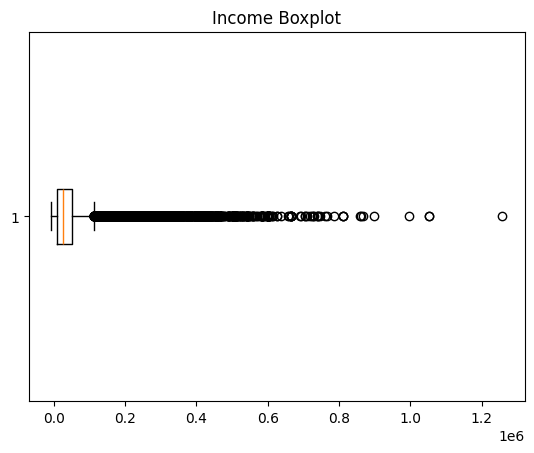

In [31]:
plt.boxplot(df['income'], vert=False)
plt.title("Income Boxplot")
plt.show()

In [33]:
import numpy as np


# Apply Box-Cox transformation
df_fixed['income'] = (df['income']-df['income'].mean())/df['income'].std()

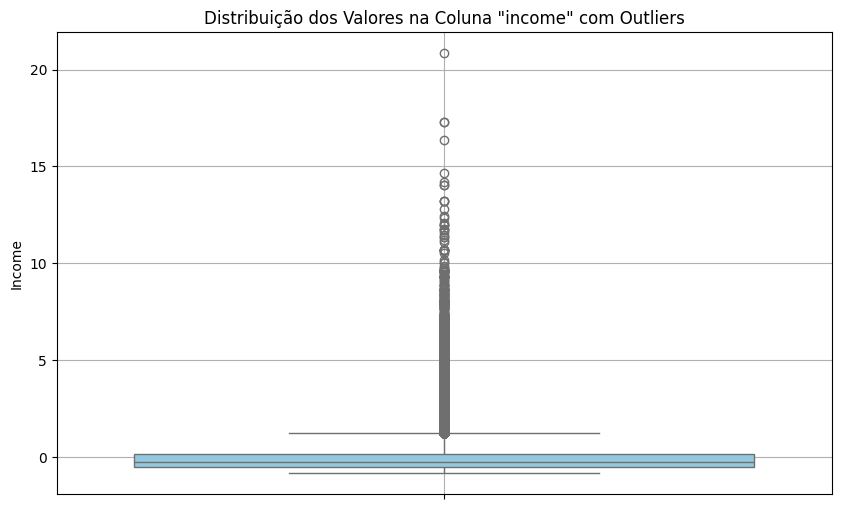

In [34]:

# Criar o gráfico boxplot para a coluna 'income'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_fixed['income'], color='skyblue')
plt.title('Distribuição dos Valores na Coluna "income" com Outliers')
plt.ylabel('Income')
plt.grid(True)
plt.show()


income
-0.718691    6691
-0.203887    1650
-0.375488    1394
-0.032286    1390
 0.139316    1357
             ... 
 3.897385       1
-0.548634       1
-0.321949       1
-0.117057       1
-0.257941       1
Name: count, Length: 4445, dtype: int64


/tmp/ipykernel_296812/1007411745.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_fixed['income'], color='blue', shade=True)


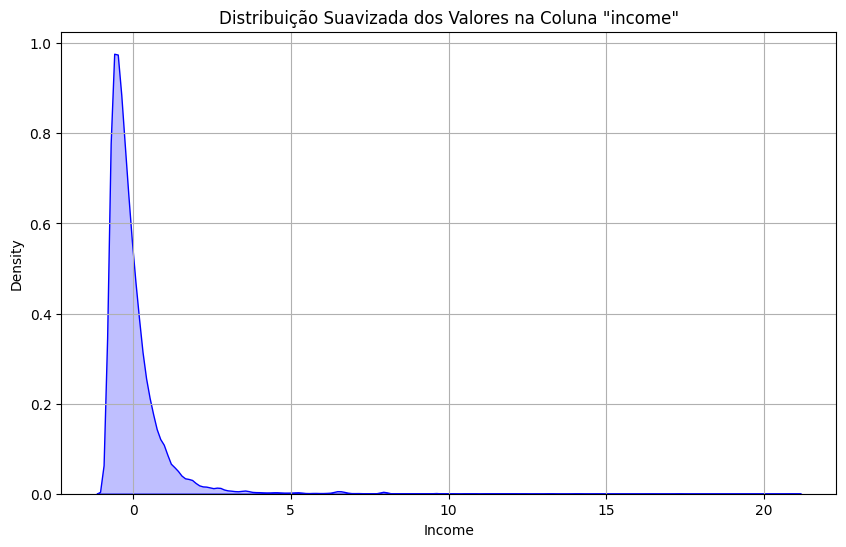

In [35]:
is_imployed_counts = df_fixed['income'].value_counts()
print(is_imployed_counts)
plt.figure(figsize=(10, 6))
sns.kdeplot(df_fixed['income'], color='blue', shade=True)
plt.title('Distribuição Suavizada dos Valores na Coluna "income"')
plt.xlabel('Income')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [36]:
df_fixed = df_fixed.dropna()

df_fixed = pd.get_dummies(df_fixed, columns=['sex'])
df_fixed = pd.get_dummies(df_fixed, columns=['marital_status'])
df_fixed = pd.get_dummies(df_fixed, columns=['housing_type'])
df_fixed['recent_move_b'] = df_fixed['recent_move_b'].replace('F', False)
df_fixed['recent_move_b'] = df_fixed['recent_move_b'].replace('T', True)
df_fixed = df_fixed.drop(columns=['state_of_res'])
df_fixed = df_fixed.drop(columns=['Unnamed: 0'])
df_fixed = df_fixed.drop(columns=['custid'])
list(df_fixed.columns)
#df_encoded = df_encoded.drop(df.columns[9])



/tmp/ipykernel_296812/3310675832.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fixed['recent_move_b'] = df_fixed['recent_move_b'].replace('T', True)


['is_employed',
 'income',
 'health_ins',
 'num_vehicles',
 'age',
 'code_column',
 'gas_usage',
 'rooms',
 'recent_move_b',
 'sex_Female',
 'sex_Male',
 'marital_status_Divorced/Separated',
 'marital_status_Married',
 'marital_status_Never married',
 'marital_status_Widowed',
 'housing_type_Homeowner free and clear',
 'housing_type_Homeowner with mortgage/loan',
 'housing_type_Occupied with no rent',
 'housing_type_Rented']

In [10]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_fixed['income'].quantile(0.25)
Q3 = df_fixed['income'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
df_fixed = df_fixed[(df_fixed['income'] >= lower_bound) & (df_fixed['income'] <= upper_bound)]

sex
Female            37461
Male              34997
Missing values        0
Name: count, dtype: int64


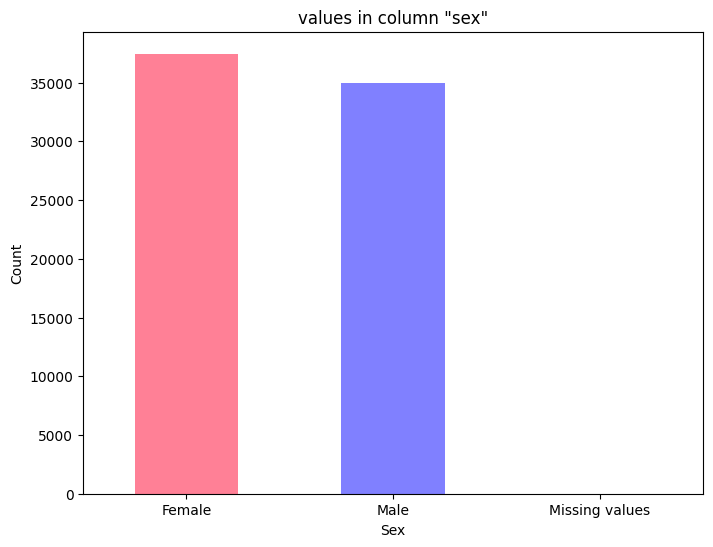

In [20]:
sex_counts = df['sex'].value_counts()
sex_counts['Missing values'] = df['sex'].isnull().sum()
print(sex_counts)
plt.figure(figsize=(8, 6)) 
sex_counts.plot(kind='bar',color=['#FF8096','#8080FF'])
plt.title('values in column "sex"')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import time

target = 'health_ins'
X = df_fixed.drop(target, axis=1)
y = df_fixed[target]
# Divide X_resampled and y_resampled into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier

dec_tree_measures = pd.DataFrame(columns=['max_depth', 'accuracy', 'f1', 'time_s'])

max_depths = list(range(3, 16, 2)) + [None]
crit = 'gini'

for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth, criterion=crit)
    
    start_t = time.time()
    model.fit(X_train, y_train)
    time_spent = time.time() - start_t

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    dec_tree_measures.loc[len(dec_tree_measures)] = [max_depth, acc, f1, time_spent]

    print(f'max_depth: {max_depth}\taccuracy: {acc}\tf1: {f1}\ttime: {time_spent}')

dec_tree_measures

max_depth: 3	accuracy: 0.9090780642882373	f1: 0.9523739037116531	time: 0.08759522438049316
max_depth: 5	accuracy: 0.9090780642882373	f1: 0.9523739037116531	time: 0.06271719932556152
max_depth: 7	accuracy: 0.9080183680678205	f1: 0.9517706326863239	time: 0.09722614288330078
max_depth: 9	accuracy: 0.9032850582832921	f1: 0.9490452972047493	time: 0.10934138298034668
max_depth: 11	accuracy: 0.8978452843518191	f1: 0.945988346033169	time: 0.14069771766662598
max_depth: 13	accuracy: 0.8893677145884846	f1: 0.9408922774967917	time: 0.16865324974060059
max_depth: 15	accuracy: 0.8784175203108442	f1: 0.9343755958055291	time: 0.16304922103881836
max_depth: None	accuracy: 0.8470505121865065	f1: 0.9151745484464993	time: 0.18785691261291504


,max_depth,accuracy,f1,time_s
0,3.0,0.909078,0.952374,0.087595
1,5.0,0.909078,0.952374,0.062717
2,7.0,0.908018,0.951771,0.097226
3,9.0,0.903285,0.949045,0.109341
4,11.0,0.897845,0.945988,0.140698
5,13.0,0.889368,0.940892,0.168653
6,15.0,0.878418,0.934376,0.163049
7,NaN,0.847051,0.915175,0.187857


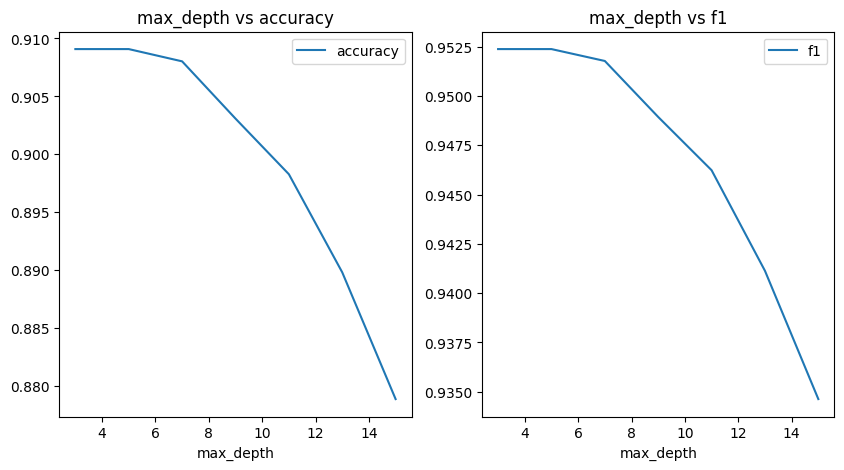

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

dec_tree_measures.plot(x='max_depth', y='accuracy', ax=ax[0], title='max_depth vs accuracy')
dec_tree_measures.plot(x='max_depth', y='f1', ax=ax[1], title='max_depth vs f1')

plt.show()

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn_measures = pd.DataFrame(columns=['n_neighbors', 'accuracy', 'f1', 'time_s'])

n_neighbors = list(range(1, 50, 2))
dist_metric = 'minkowski'

for k in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=k, metric=dist_metric)
    model.fit(X_train, y_train)
    
    start_t = time.time()
    y_pred = model.predict(X_test)
    time_spent = time.time() - start_t

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    knn_measures.loc[len(knn_measures)] = [k, acc, f1, time_spent]

    print(f'n_neighbors: {k}\taccuracy: {acc}\tf1: {f1}\ttime: {time_spent}')

knn_measures

n_neighbors: 1	accuracy: 0.8512892970681738	f1: 0.9184393041187183	time: 0.4801669120788574
n_neighbors: 3	accuracy: 0.8890851289297068	f1: 0.9408350919505577	time: 0.5116004943847656
n_neighbors: 5	accuracy: 0.9001766160367362	f1: 0.9472032283376303	time: 0.503643274307251
n_neighbors: 7	accuracy: 0.904344754503709	f1: 0.9495979749851102	time: -0.7421116828918457
n_neighbors: 9	accuracy: 0.9079477216531261	f1: 0.9516242806757007	time: 0.4918842315673828
n_neighbors: 11	accuracy: 0.9082303073119039	f1: 0.9518049938782325	time: 0.48613595962524414
n_neighbors: 13	accuracy: 0.9087248322147651	f1: 0.9520913675467221	time: 0.5073263645172119
n_neighbors: 15	accuracy: 0.9087954786294595	f1: 0.952172785536991	time: 0.5168132781982422
n_neighbors: 17	accuracy: 0.9087248322147651	f1: 0.9521410579345088	time: 0.5123260021209717
n_neighbors: 19	accuracy: 0.9087248322147651	f1: 0.9521552362612946	time: 0.5162296295166016
n_neighbors: 21	accuracy: 0.9090074178735429	f1: 0.9523139577934099	time: 0.

,n_neighbors,accuracy,f1,time_s
0,1.0,0.851289,0.918439,0.480167
1,3.0,0.889085,0.940835,0.511600
2,5.0,0.900177,0.947203,0.503643
3,7.0,0.904345,0.949598,-0.742112
4,9.0,0.907948,0.951624,0.491884
5,11.0,0.908230,0.951805,0.486136
6,13.0,0.908725,0.952091,0.507326
7,15.0,0.908795,0.952173,0.516813
8,17.0,0.908725,0.952141,0.512326
9,19.0,0.908725,0.952155,0.516230


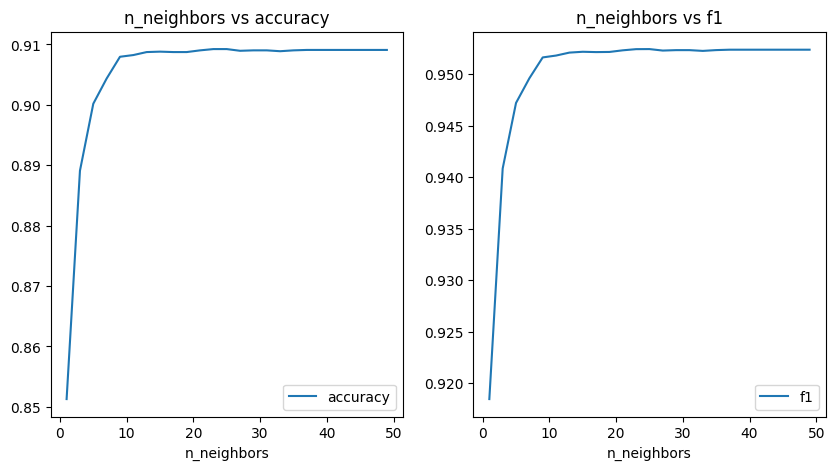

In [25]:
# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

knn_measures.plot(x='n_neighbors', y='accuracy', ax=ax[0], title='n_neighbors vs accuracy')
knn_measures.plot(x='n_neighbors', y='f1', ax=ax[1], title='n_neighbors vs f1')

plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg_measures = pd.DataFrame(columns=['C', 'accuracy', 'f1', 'time_s'])

cs = [0.001, 0.01, 0.1, 1, 10, 100]
solver = 'lbfgs'

for c in cs:
    model = LogisticRegression(C=c, solver=solver)
    
    start_t = time.time()
    model.fit(X_train, y_train)
    time_spent = time.time() - start_t

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    log_reg_measures.loc[len(log_reg_measures)] = [c, acc, f1, time_spent]

    print(f'C: {c}\taccuracy: {acc}\tf1: {f1}\ttime: {time_spent}')

log_reg_measures

/mnt/c/Users/apl_d/Desktop/Faculdade/Introduction to Data Science/feup-icd-project/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mnt/c/Users/apl_d/Desktop/Faculdade/Introduction to Data Science/feup-icd-project/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also 

C: 0.001	accuracy: 0.9089367714588484	f1: 0.9522963620887458	time: 0.1983485221862793
C: 0.01	accuracy: 0.908866125044154	f1: 0.9522575869726129	time: 0.11302399635314941


/mnt/c/Users/apl_d/Desktop/Faculdade/Introduction to Data Science/feup-icd-project/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mnt/c/Users/apl_d/Desktop/Faculdade/Introduction to Data Science/feup-icd-project/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also 

C: 0.1	accuracy: 0.9083716001412928	f1: 0.9519789699729719	time: 0.13335466384887695
C: 1	accuracy: 0.9083009537265984	f1: 0.951936606679997	time: 0.11562442779541016
C: 10	accuracy: 0.9085128929706817	f1: 0.9520601192018657	time: 0.11397075653076172
C: 100	accuracy: 0.9083716001412928	f1: 0.9519718570635067	time: 0.11096858978271484


/mnt/c/Users/apl_d/Desktop/Faculdade/Introduction to Data Science/feup-icd-project/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mnt/c/Users/apl_d/Desktop/Faculdade/Introduction to Data Science/feup-icd-project/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also 

,C,accuracy,f1,time_s
0,0.001,0.908937,0.952296,0.198349
1,0.010,0.908866,0.952258,0.113024
2,0.100,0.908372,0.951979,0.133355
3,1.000,0.908301,0.951937,0.115624
4,10.000,0.908513,0.952060,0.113971
5,100.000,0.908372,0.951972,0.110969


In [1]:
results = pd.DataFrame(columns=['model', 'accuracy', 'f1', 'time_s'])

dtree = dec_tree_measures.loc[dec_tree_measures['max_depth'] == 5].iloc[0]
results.loc[len(results)] = ['DecisionTree', dtree['accuracy'], dtree['f1'], dtree['time_s']]

knn = knn_measures.loc[knn_measures['n_neighbors'] == 19].iloc[0]
results.loc[len(results)] = ['KNN', knn['accuracy'], knn['f1'], knn['time_s']]

log_reg = log_reg_measures.loc[log_reg_measures['C'] == 1].iloc[0]
results.loc[len(results)] = ['LogisticRegression', log_reg['accuracy'], log_reg['f1'], log_reg['time_s']]

results

NameError: name 'pd' is not defined

DecisionTreeClassifier Report:
               precision    recall  f1-score   support

       False       0.20      0.23      0.22      1287
        True       0.92      0.91      0.91     12868

    accuracy                           0.85     14155
   macro avg       0.56      0.57      0.56     14155
weighted avg       0.86      0.85      0.85     14155

Accuracy: 0.85


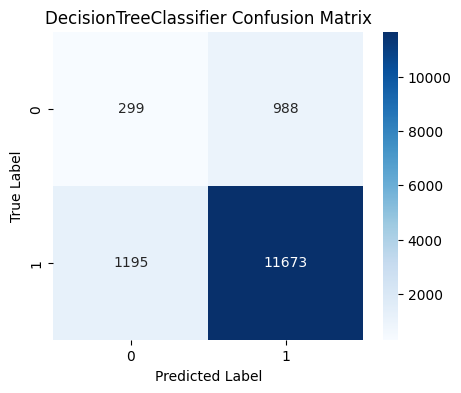

KNeighborsClassifier Report:
               precision    recall  f1-score   support

       False       0.26      0.05      0.09      1287
        True       0.91      0.99      0.95     12868

    accuracy                           0.90     14155
   macro avg       0.58      0.52      0.52     14155
weighted avg       0.85      0.90      0.87     14155

Accuracy: 0.90


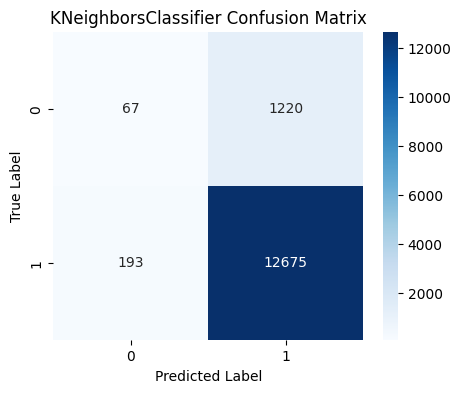

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

target = 'health_ins'
X = df_fixed.drop(target, axis=1)
y = df_fixed[target]
# Divide X_resampled and y_resampled into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize classifiers
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
svm = SVC(kernel='linear', random_state=42)

# Function to evaluate classifier
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print classification report
    print(f"{model.__class__.__name__} Report:\n", classification_report(y_test, y_pred))
    
    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model.__class__.__name__} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Evaluate each model
evaluate_model(dt, X_train, X_test, y_train, y_test)
evaluate_model(knn, X_train, X_test, y_train, y_test)
#evaluate_model(svm, X_train, X_test, y_train, y_test)

/mnt/c/Users/apl_d/Desktop/Faculdade/Introduction to Data Science/feup-icd-project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/apl_d/Desktop/Faculdade/Introduction to Data Science/feup-icd-project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/apl_d/Desktop/Faculdade/Introduction to Data Science/feup-icd-project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined an

XGBClassifier Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00      1287
        True       0.91      1.00      0.95     12868

    accuracy                           0.91     14155
   macro avg       0.45      0.50      0.48     14155
weighted avg       0.83      0.91      0.87     14155

Accuracy: 0.91


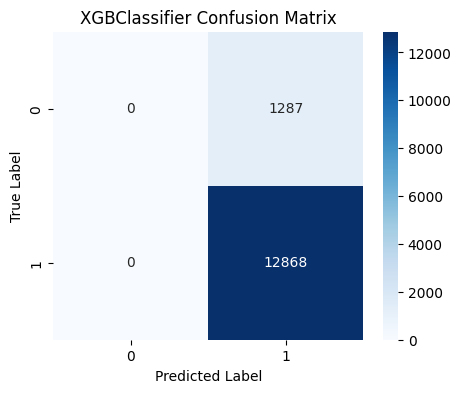

In [54]:
! pip install xgboost
import xgboost as xgb


target = 'health_ins'
X = df_fixed.drop(target, axis=1)
y = df_fixed[target]
# Divide X_resampled and y_resampled into training and testing sets
X_train_boost, X_test_boost, y_train_boost, y_test_boost = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

xgb_model = xgb.XGBClassifier(learning_rate=0.001,
                            max_depth = 1, 
                            n_estimators = 100,
                              scale_pos_weight=3,enable_categorical=True)
evaluate_model(xgb_model, X_train_boost, X_test_boost, y_train_boost, y_test_boost)

After SMOTE: {True: np.int64(51470), False: np.int64(51470)}
Evaluating Decision Tree with SMOTE
DecisionTreeClassifier Report:
               precision    recall  f1-score   support

       False       0.20      0.25      0.22      1287
        True       0.92      0.90      0.91     12868

    accuracy                           0.84     14155
   macro avg       0.56      0.57      0.57     14155
weighted avg       0.86      0.84      0.85     14155

Accuracy: 0.84


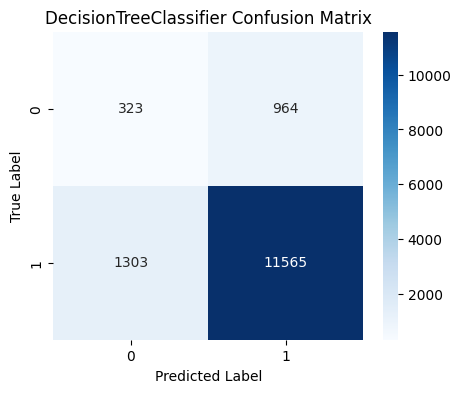

After Under Sampling: {False: np.int64(5146), True: np.int64(5146)}
Evaluating Decision Tree with Under Sampling
DecisionTreeClassifier Report:
               precision    recall  f1-score   support

       False       0.16      0.63      0.25      1287
        True       0.95      0.66      0.78     12868

    accuracy                           0.66     14155
   macro avg       0.55      0.65      0.51     14155
weighted avg       0.88      0.66      0.73     14155

Accuracy: 0.66


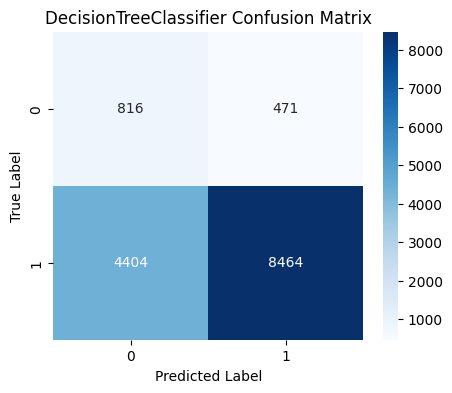

In [40]:
! pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print classification report
    print(f"{model.__class__.__name__} Report:\n", classification_report(y_test, y_pred))
    
    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model.__class__.__name__} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
dt = DecisionTreeClassifier(random_state=42)
# Apply SMOTE (Oversampling)
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
print("After SMOTE:", dict(pd.Series(y_res).value_counts()))

# Train and evaluate model after SMOTE
print("Evaluating Decision Tree with SMOTE")
evaluate_model(dt, X_res, X_test, y_res, y_test)

# Apply Random Under Sampling
under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print("After Under Sampling:", dict(pd.Series(y_res).value_counts()))

# Train and evaluate model after undersampling
print("Evaluating Decision Tree with Under Sampling")
evaluate_model(dt, X_res, X_test, y_res, y_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


rf_model = RandomForestClassifier(n_estimators=500,max_depth=10, random_state=42)

rf_model.fit(X_train,y_train)

rf_model_reg = RandomForestRegressor(n_estimators=100,random_state=42)
rf_model_reg.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"accuracy{accuracy}")


from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[100,200,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

accuracy0.9091487107029318


/mnt/c/Users/apl_d/Desktop/Faculdade/Introduction to Data Science/feup-icd-project/.venv/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 500}


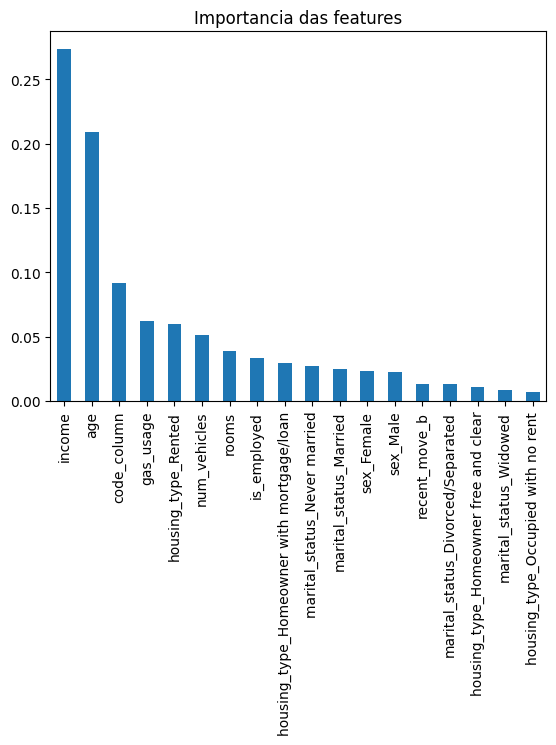

In [18]:
importancias = pd.Series(rf_model.feature_importances_,index=X.columns)
importancias.sort_values(ascending=False).plot(kind='bar')

plt.title('Importancia das features')
plt.show()